<a href="https://colab.research.google.com/github/ritwiks9635/My_priject_file_6/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Dataset = "https://www.kaggle.com/datasets/ vjchoudhary7/customer-segmentation-tutorial-in-python?datasetId=42674&sortBy=voteCount"

**extract zipfile**

In [ ]:
#zipfile
from zipfile import ZipFile
data = "/content/archive (1).zip"
with ZipFile(data,"r") as zip:
  zip.extractall()
  print("the data has been extracted ")

the data has been extracted 


***Import Requires models***

In [ ]:
import numpy as np
import pandas as pd

****Load Dataset****

In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


****Data Information****

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
data.shape

(200, 5)

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
data["Age"].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [ ]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

****Plot Some Data****

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
plt.style.use('fivethirtyeight')

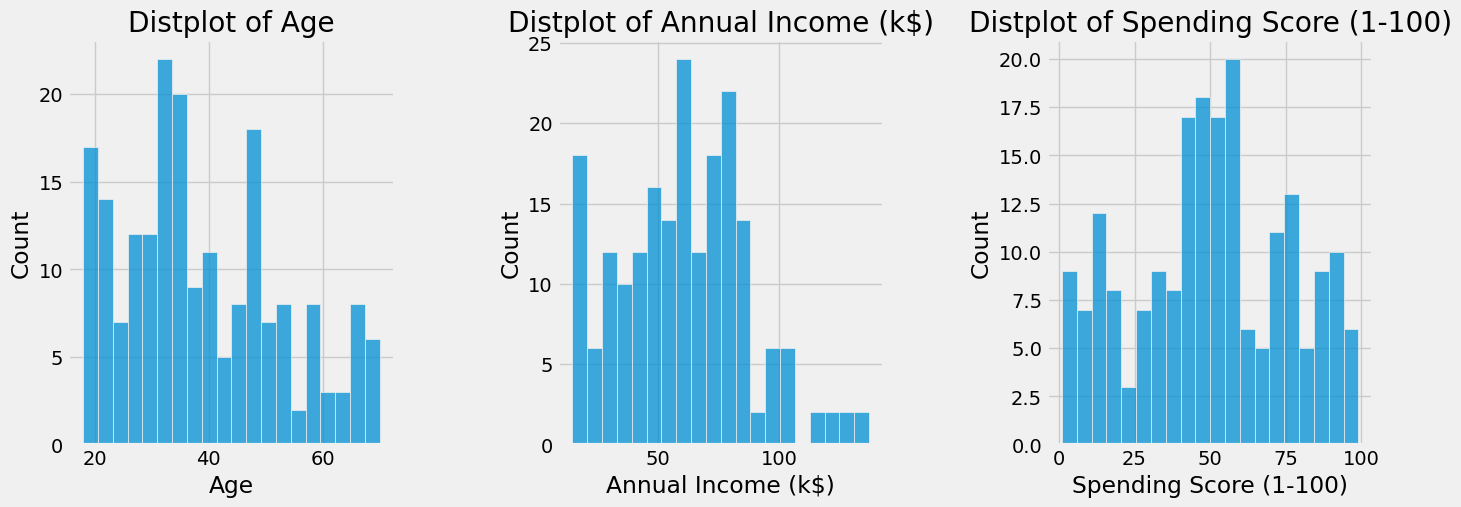

In [ ]:
plt.figure(figsize=(15,5))
n = 0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  n += 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.histplot(data[x], bins = 20)
  plt.title("Distplot of {}".format(x))
plt.show()

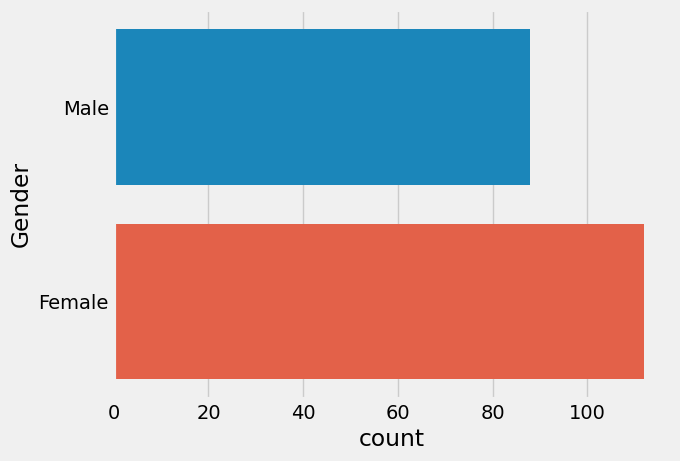

In [ ]:
sns.countplot(y = "Gender", data = data)
plt.show()

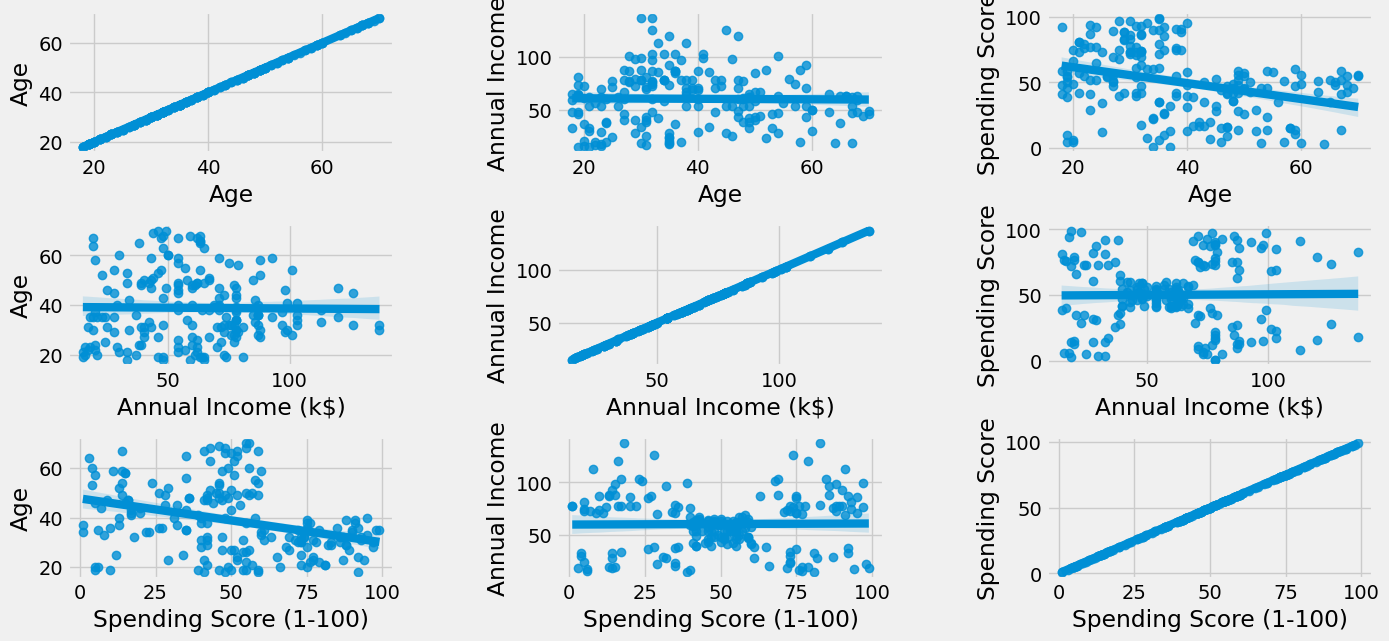

In [ ]:
plt.figure(figsize=(15,7))
n = 0
for x in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
  for y in ["Age", "Annual Income (k$)", "Spending Score (1-100)"]:
    n += 1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(x = x, y = y , data = data)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

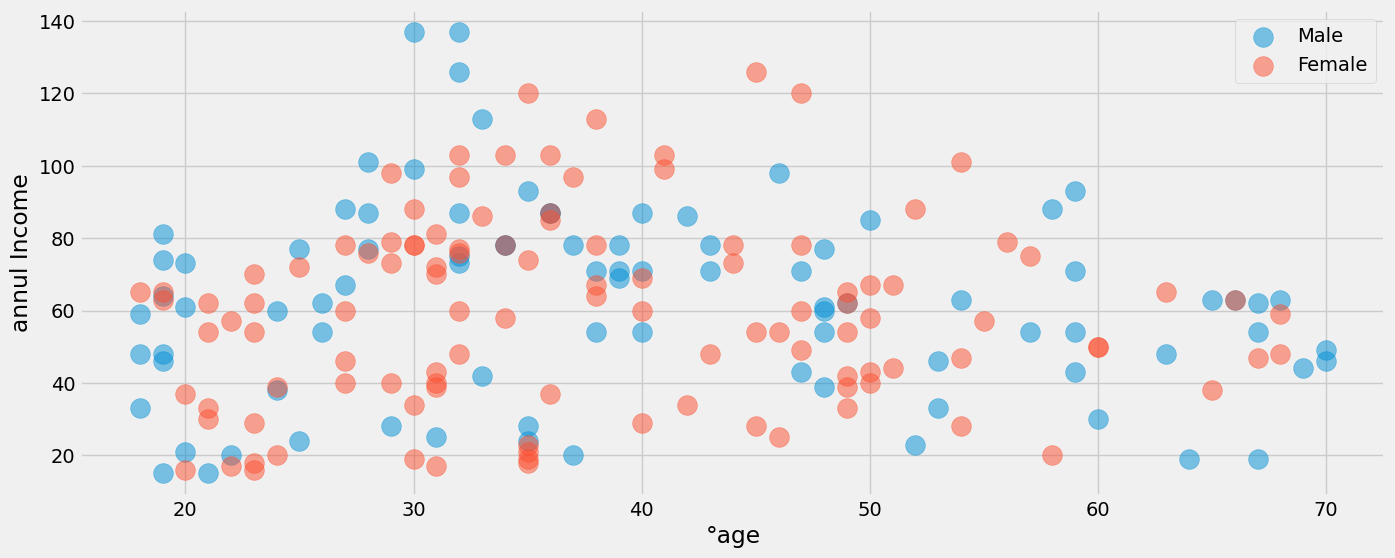

In [ ]:
plt.figure(figsize=(15,6))
for g in ['Male', 'Female']:
  plt.scatter(x = "Age", y = "Annual Income (k$)", data = data[data["Gender"] == g], s = 200, alpha = 0.5, label = g)
  plt.xlabel("°age"), plt.ylabel("annul Income")
  plt.legend()
plt.show()

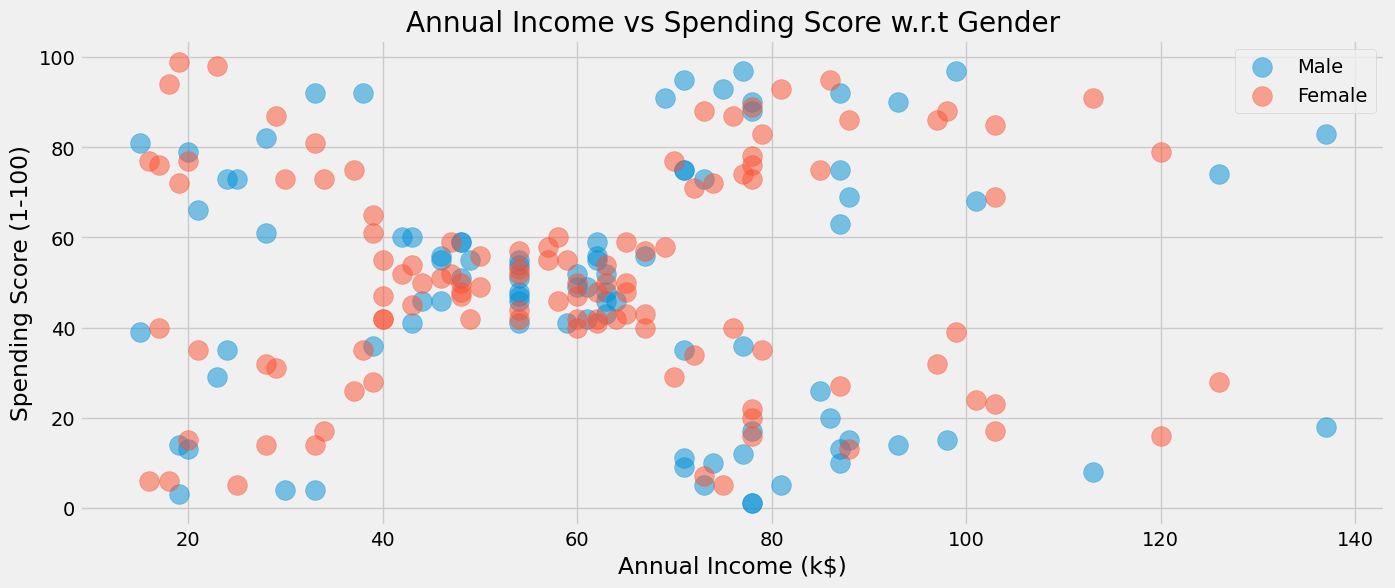

In [ ]:
plt.figure(figsize = (15 , 6))
for gender in ['Male' , 'Female']:
  plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = data[data['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
  plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
  plt.title('Annual Income vs Spending Score w.r.t Gender')
  plt.legend()
plt.show()

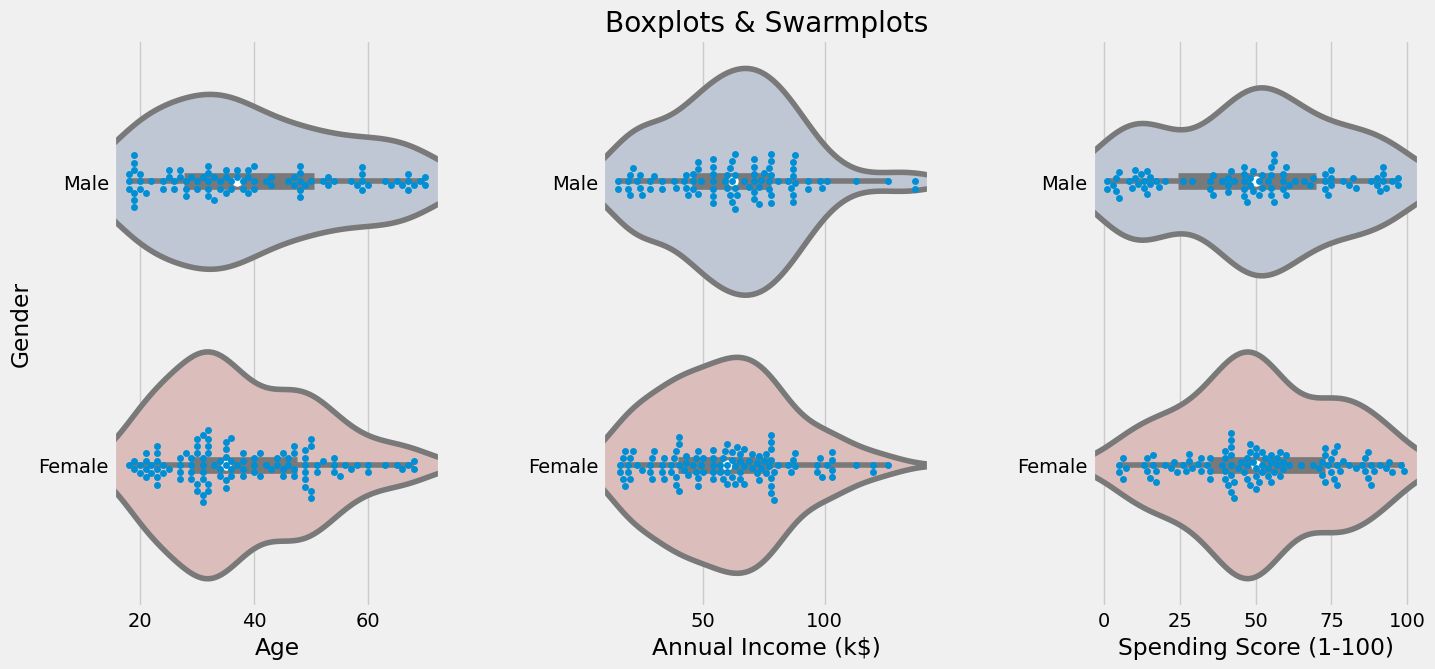

In [ ]:
plt.figure(figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = x , y = 'Gender' , data = data, palette = 'vlag')
    sns.swarmplot(x = x , y = 'Gender' , data = data)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

*****Import Kmeans for clustering*****

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# 1st age and Spending score clustering

In [ ]:
X = data[["Age", "Spending Score (1-100)"]].iloc[:,:].values
inertia = []
for n in range(1,11):
  kmeans = (KMeans(n_clusters = n, init = "k-means++", n_init = 10, max_iter = 300, tol = 0.001, random_state=111, algorithm="elkan"))
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


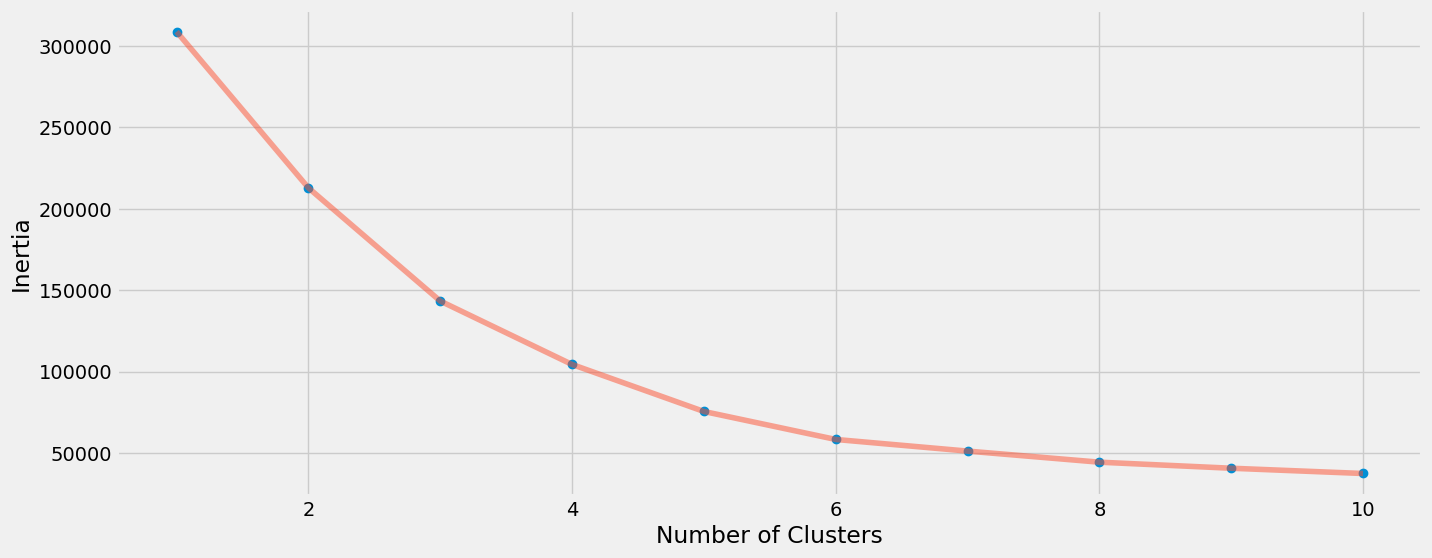

In [ ]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(X)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [ ]:
centroids1

array([[27.61702128, 49.14893617],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667]])

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

In [ ]:
Z

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

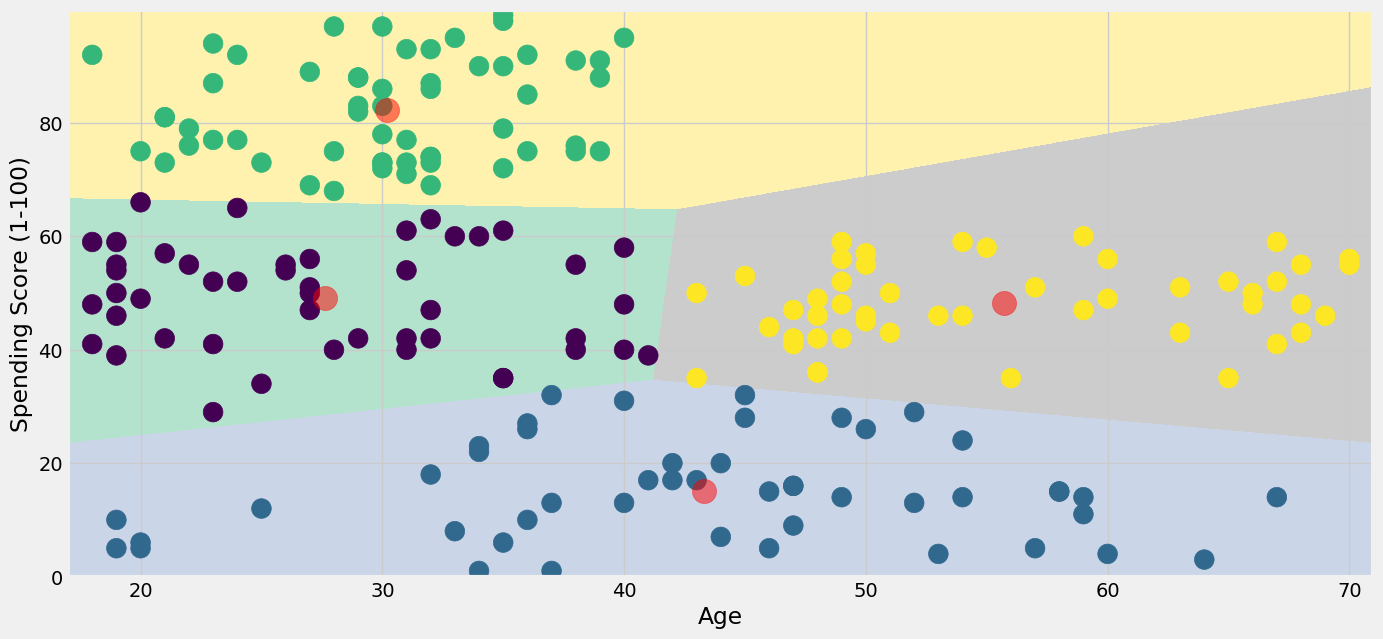

In [ ]:
plt.figure(figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = data, c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [ ]:
# 2nd Annual Income and Spending score use for clustering

In [ ]:
X1 = data[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[:,:].values
inertia = []
for n in range(1,11):
  kmeans =(KMeans(n_clusters = n, init = 'k-means++', n_init = 10, max_iter=300, tol=0.0001,  random_state= 111, algorithm='elkan'))
  kmeans.fit(X1)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


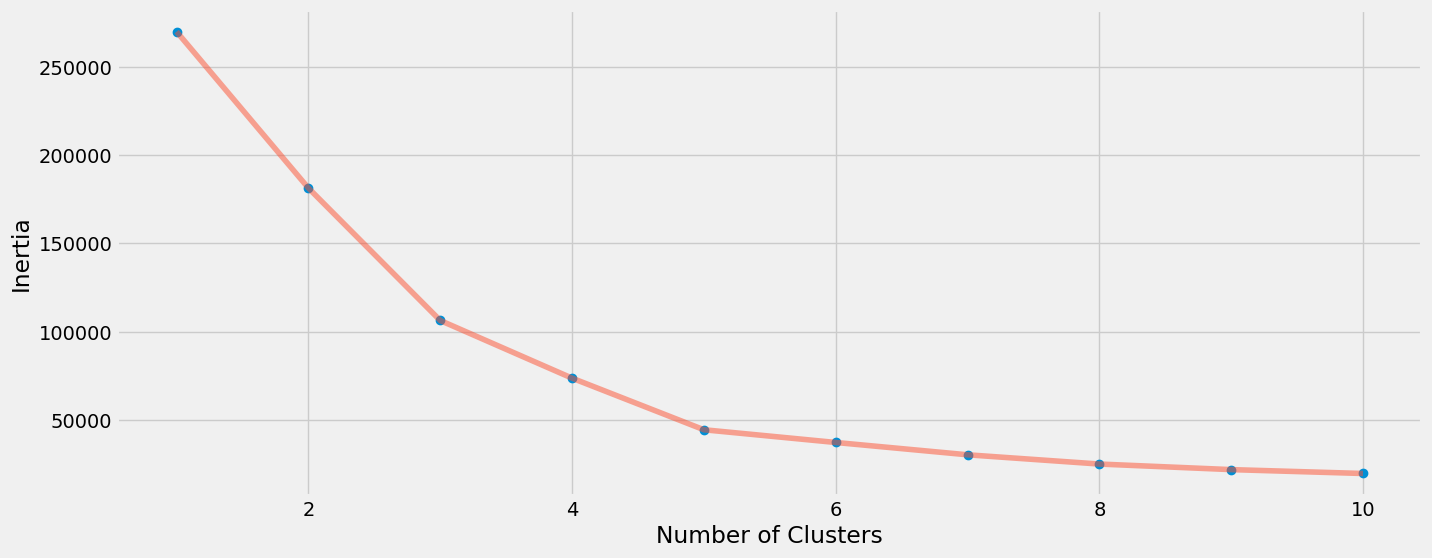

In [ ]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(X1)
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

**plot model clustering**

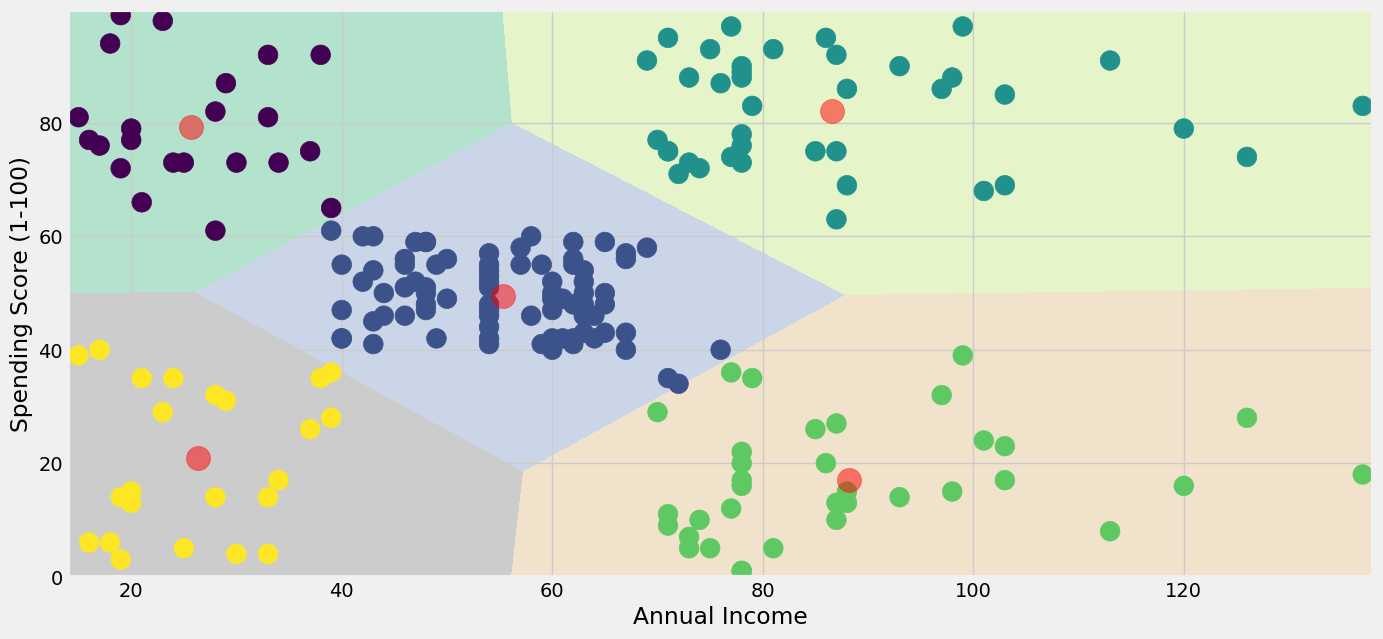

In [ ]:
plt.figure(figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = "Annual Income (k$)",y = 'Spending Score (1-100)' , data = data, c = labels1 ,s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income')
plt.show()

In [ ]:
# clustering using Age, Annual Income , Spending score columns

In [ ]:
X2 = data[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    kmeans = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    kmeans.fit(X2)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


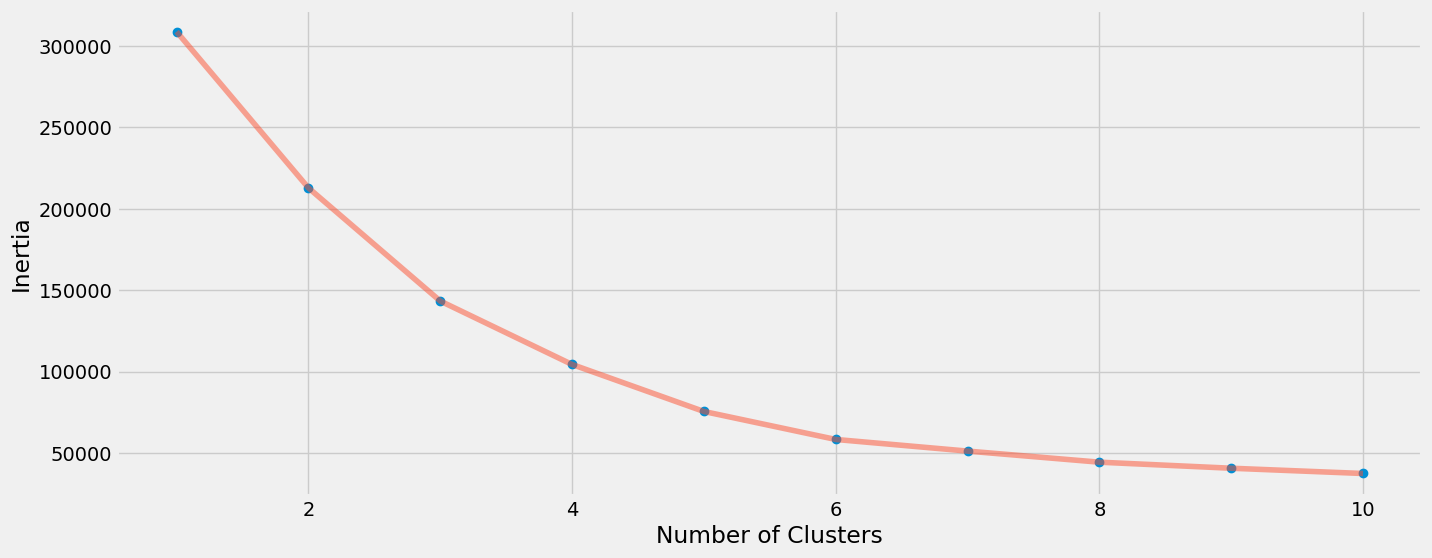

In [ ]:
plt.figure(figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
kmeans = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
kmeans.fit(X2)
labels3 = kmeans.labels_
centroids3 = kmeans.cluster_centers_

In [ ]:
### Some Graphical Visualization

In [ ]:
import plotly as py
import plotly.graph_objs as go

data['label3'] =  labels3
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = data['label3'], 
        size= 20,
        line=dict(
            color= data['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(title = 'Clusters', scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)